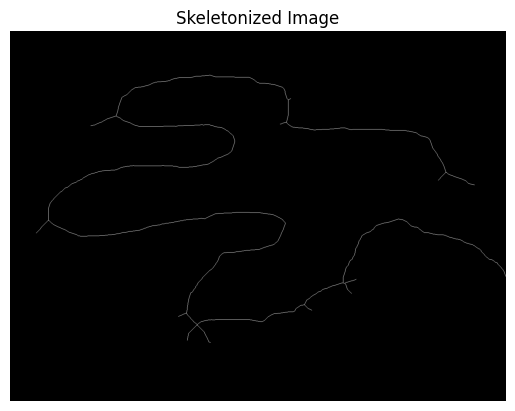

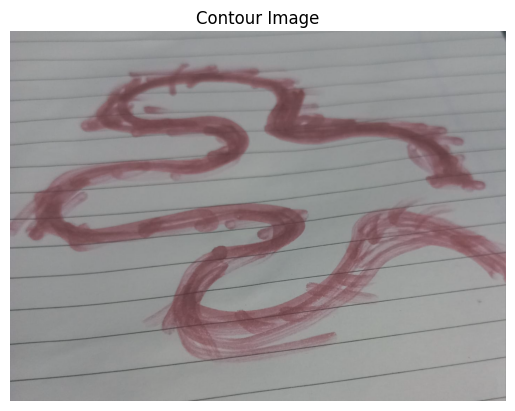

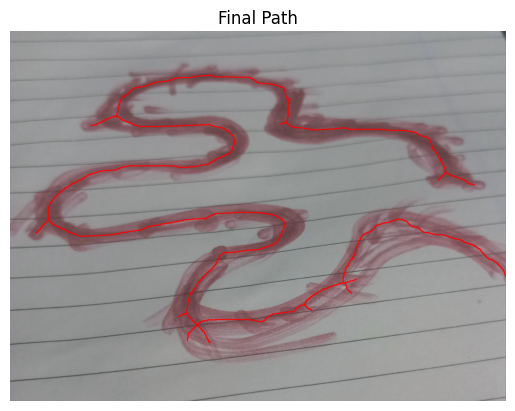

True

In [41]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize,remove_small_objects
from skimage.util import img_as_ubyte

photo = cv2.imread('/content/Input_image (1).jpg')
#cv2_imshow(photo)

# skeleton = skeletonize(mask)
# skel_img = img_as_ubyte(skeleton)

# plt.imshow(skel_img, cmap = 'gray')
# plt.title('Skeletonized Image')
# plt.axis(False)
# plt.show()

# kernel_size=(5,5)
# blur=cv2.GaussianBlur(lane_segment,kernel_size,0) # Depends on lane_segment
# edge_detection=cv2.Canny(blur,150,250)
# rho=1
# theta=np.pi/180
# threshold=1 # minimum number of intersections to consider it a line
# minLineLength=5
# maxLineGap=1
# lines=cv2.HoughLinesP(edge_detection,rho,theta,threshold,minLineLength,maxLineGap)

# The following lines are commented out in the original code and are related to drawing lines.
# They depend on the 'lines' variable which is calculated later.

# cv2_imshow("Detected lines",photo) # Use cv2_imshow
# cv2.waitKey(0) # Not needed with cv2_imshow
# cv2.destroyAllWindows() # Not needed with cv2_imshow

# def image_preprocessing(image) # Function definition (commented out)
#     image=cv2.cvtColor(photo,cv2.COLOR_BGR2HSV) # This line was outside the commented function and is needed
#     kernel_size=(5,5)
#     blur=cv2.GaussianBlur(image,kernel_size,0)
#     edges=cv2.Canny(blur,0,50)
#     return edges

# image=image_preprocessing(photo) # Function call (commented out)

# Image processing steps from the second cell:
image = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV) # Convert to HSV

blue_lower_limit = np.array([100, 50, 50])
blue_upper_limit = np.array([180, 255, 255])
blue_segment = cv2.inRange(image, blue_lower_limit, blue_upper_limit)
#Removing Noise from the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# 1. Opening: erode→dilate  (kill tiny white dots)
mask = cv2.morphologyEx(blue_segment, cv2.MORPH_OPEN, kernel, iterations=11)

# 2. Closing: dilate→erode (seal small holes & breaks)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=11)

# 3. median blur for smooth edges
mask = cv2.medianBlur(mask, 3)

# 'lane_segment' is the result of bitwise_or, but using 'image' twice with 'mask=blue_segment'
# is likely incorrect. The mask should be applied to the original image or the HSV image.
# Assuming you want the HSV image masked by the blue segment mask:
lane_segment = cv2.bitwise_and(image, image, mask=mask) # Corrected line assuming you want the segmented region in HSV


# Now you can perform skeletonization on the blue_segment mask (which is a binary image)
# Apply skeletonize to the 1-channel binary mask instead of the 3-channel lane_segment
skeleton = skeletonize(mask) # Use the binary mask for skeletonization

skel_img = img_as_ubyte(skeleton)

plt.imshow(skel_img, cmap = 'gray')
plt.title('Skeletonized Image')
plt.axis(False)
plt.show()
#cleaned=remove_small_objects(skel_img,min_size=3900)
#cv2_imshow(cleaned)

# Find contours on the 1-channel skeletonized image
contours,_ =cv2.findContours(skel_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cont_img = np.zeros(image.shape, dtype = 'uint8')
# Since cont_img is 3-channel, you might want to draw contours on a 1-channel image first
# or ensure the drawing color is appropriate for a 3-channel image (like (255, 255, 255) for white)
cv2.drawContours(cont_img, contours, -1, (255, 255, 255), 2)

plt.imshow(photo)
plt.title('Contour Image')
plt.axis(False)
plt.show()

# final_image = image.copy() # This variable is created but not used later

# Draw contours on the original photo (3-channel)
cv2.drawContours(photo, contours, -1, (255, 0, 0), 2) # Draw in blue

plt.imshow(photo)
plt.title('Final Path')
plt.axis(False)
plt.show()

# The line below is redundant as contours were already drawn in blue above.
# If you want to draw in green, uncomment and remove the previous drawContours line.
# cv2.drawContours(photo, contours, -1, (0, 255, 0), 2)

cv2.imwrite("contours_drawn.png", photo)
#kernel_size = (5, 5)
# Apply GaussianBlur to the blue_segment mask or the original image, not the HSV lane_segment
# Applying to the mask (binary image) before Canny is common.
# blur=cv2.GaussianBlur(skeleton, kernel_size, 0)

# edge_detection = cv2.Canny(blur, 150, 250) # Apply Canny to the blurred mask

# rho = 1
# theta = np.pi / 180
# threshold = 1  # minimum number of intersections to consider it a line
# minLineLength = 3
# maxLineGap = 5
# lines = cv2.HoughLinesP(cleaned, rho, theta, threshold, minLineLength, maxLineGap)

# # Draw the detected lines on the original photo
# if lines is not None:
#     for line in lines:
#         for x1, y1, x2, y2 in line:
#             cv2.line(photo, (x1, y1), (x2, y2), (0, 255, 0), 2) # Draw lines in green

# Use cv2_imshow to display the image with detected lines
#cv2_imshow(photo)